### 1. Keras Implementation

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
# Dataset
X = np.array([[0, 0],[0, 1],[1, 0],[1, 1]], dtype=np.float32)
y = np.array([[0], [1], [1], [0]], dtype=np.float32)

In [ ]:
model = Sequential([
    Dense(4, input_dim=2, activation='relu'),
    Dense(1, activation='sigmoid')
])

C:\Users\shrut\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile
model.compile(
    optimizer=Adam(learning_rate=0.1),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model.fit(X, y, epochs=500, verbose=0)

In [ ]:
predictions = model.predict(X)
print("Predicted Outputs:")
print(np.round(predictions))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
Predicted Outputs:
[[0.]
 [1.]
 [1.]
 [0.]]


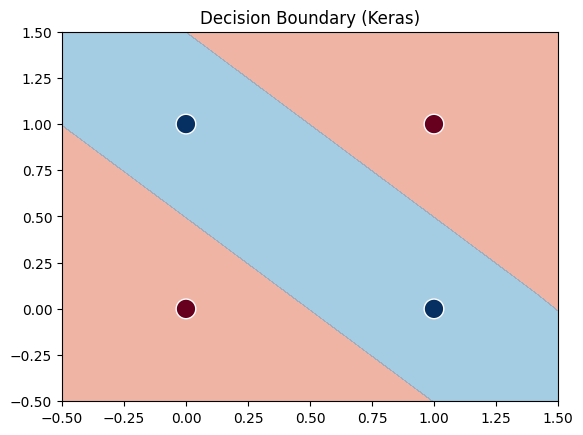

In [ ]:
#plot
def plot_keras_boundary(X, y, model):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()], verbose=0)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap="RdBu", edgecolors='white', s=200)
    plt.title("Decision Boundary (Keras)")
    plt.show()

plot_keras_boundary(X, y, model)

### 2. PyTorch Implementation

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

In [ ]:
#Dataset
X = torch.tensor([[0,0], [0,1], [1,0], [1,1]], dtype=torch.float32)
y = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

In [ ]:
#MLP Model
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.hidden = nn.Linear(2, 4)
        self.output = nn.Linear(4, 1)

    def forward(self, x):
        x = torch.tanh(self.hidden(x))
        x = torch.sigmoid(self.output(x))
        return x

In [ ]:
X_torch = torch.tensor(X)
y_torch = torch.tensor(y)

C:\Users\shrut\AppData\Local\Temp\ipykernel_23844\2799749187.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_torch = torch.tensor(X)
C:\Users\shrut\AppData\Local\Temp\ipykernel_23844\2799749187.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_torch = torch.tensor(y)


In [ ]:
#Loss and Optimizer
model = XORNet()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.1)

In [ ]:
for epoch in range(500):
    optimizer.zero_grad()
    outputs = model(X_torch)
    loss = criterion(outputs, y_torch)
    loss.backward()
    optimizer.step()

In [ ]:
with torch.no_grad():
    predictions = model(X_torch)
    print(torch.round(predictions))

tensor([[0.],
        [1.],
        [1.],
        [0.]])


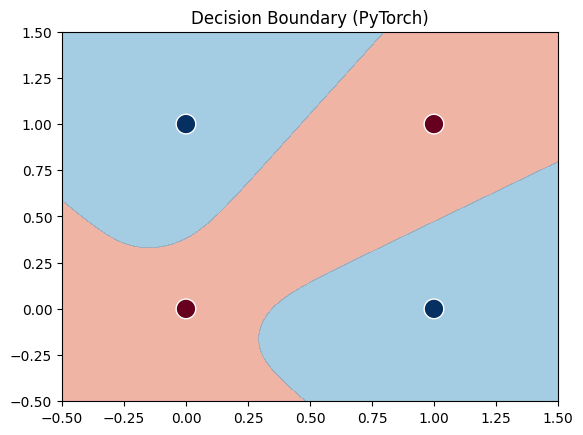

In [ ]:
# plot
def plot_pytorch_boundary(X, y, model):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid_tensor = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)
    with torch.no_grad():
        Z = model(grid_tensor).numpy()

    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap="RdBu", edgecolors='white', s=200)
    plt.title("Decision Boundary (PyTorch)")
    plt.show()
plot_pytorch_boundary(X, y, model)

PyTorch has more of a manual implementation because in the codes, I had to write the class and the training loops. Even though the code is longer than Keras, Unlike Keras, where model.fit() handles everything. I used a learning rate of 0.1 here; I tried 0.01 initially, but it was too slow to converge on the XOR pattern.

### 3. TENSORFLOW Implementation

In [ ]:
import tensorflow as tf

In [ ]:
#Initializing Weights and Biases
W1 = tf.Variable(tf.random.normal([2, 4]))
b1 = tf.Variable(tf.zeros([4]))

W2 = tf.Variable(tf.random.normal([4, 1]))
b2 = tf.Variable(tf.zeros([1]))

In [ ]:
def model(x):
    hidden = tf.nn.tanh(tf.matmul(x, W1) + b1)
    output = tf.nn.sigmoid(tf.matmul(hidden, W2) + b2)
    return output

In [ ]:
#Loss and Optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.1)

def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.keras.losses.binary_crossentropy(y_true, y_pred))

In [ ]:
for epoch in range(500):
    with tf.GradientTape() as tape:
        predictions = model(X)
        loss = loss_fn(y, predictions)

    gradients = tape.gradient(loss, [W1, b1, W2, b2])
    optimizer.apply_gradients(zip(gradients, [W1, b1, W2, b2]))

In [ ]:
print(tf.round(model(X)))

tf.Tensor(
[[0.]
 [1.]
 [1.]
 [0.]], shape=(4, 1), dtype=float32)


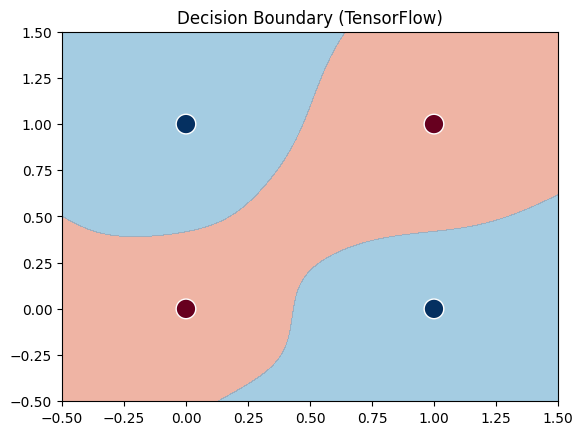

In [ ]:
# 1. Define Plotting Function for TensorFlow
def plot_tf_boundary(X, y, model_fn):
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    grid = np.c_[xx.ravel(), yy.ravel()].astype("float32")

    # TF uses the function call directly
    Z = model_fn(grid).numpy()
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], cmap="RdBu", alpha=0.6)
    plt.scatter(X[:,0], X[:,1], c=y.flatten(), cmap="RdBu", edgecolors='white', s=200)
    plt.title("Decision Boundary (TensorFlow)")
    plt.show()

# 2. Run it (Pass the function name 'tf_model')
plot_tf_boundary(X, y, model)